In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer
#코사인 유사도 함수
def cos_sim2(X,Y):
    return np.dot(X,Y)/((norm(X)*norm(Y))+1e-7) #분모가 0이됨을 방지하는 +1e-7
#영화 추천 함수의 설계
def recommand(data, name, rank=5):
    sim=[]
    for i in range(len(data)):
        if name != i:
            sim.append((cos_sim2(data[i],data[name]),i))
    sim.sort()
    sim.reverse()
    return sim[:rank]

data=pd.read_csv("movies_metadata.csv",encoding="UTF-8")
data=data.head(2000)
data['overview'].isnull().sum() #누락값 개수 확인
data['overview']=data['overview'].fillna('') # 누락값 처리
data['overview'].isnull().sum() # 누락값 개수가 0이 될것임
tfidf=TfidfVectorizer(stop_words='english') #TF-IDF행렬 생성, english 불용어 제거
tfidf_mat=tfidf.fit_transform(data['overview']).toarray() # TF-IDF를 array로 바꾸어서 함수를 적용할수있도록 변경

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
# 영화 추천 알고리즘의 실행단계 ( 인덱스 0인 토이스토리를 중심으로 작동)
#for sim, movie_id in top_match_ar2(tfidf_mat,0,10):
#    movieList.append((sim, data.loc[movie_id,'title']))
#movieList[:10]

## 각 영화 인덱스를 나타내는 index열을 추가
series = pd.Series(data.index, index = data['title']).drop_duplicates()
movieList = [] 
#input으로 index 결정
x = input('영화 제목을 입력해주세요 : ')
index = series[x]
for sim, movie_id in top_match_ar2(tfidf_mat,index,10):
    movieList.append((sim, data.loc[movie_id,'title']))
movieList[:10]

영화 제목을 입력해주세요 : Jumanji


[(0.13171053324740967, 'The Innocent Sleep'),
 (0.1280117745753078, 'Sudden Death'),
 (0.11387159214028014, 'Maverick'),
 (0.11141480787710059, 'BASEketball'),
 (0.10535682621826187, 'D3: The Mighty Ducks'),
 (0.09237886348300096, 'Peter Pan'),
 (0.09180597815598728, 'The Man Who Knew Too Little'),
 (0.08749623039617353, 'Picnic'),
 (0.08306199382349999, "The 'Burbs"),
 (0.08098635647065179, 'Shopping')]

In [64]:
a = pd.DataFrame(movieList[:10])

In [65]:
print(a)

          0                            1
0  0.131711           The Innocent Sleep
1  0.128012                 Sudden Death
2  0.113872                     Maverick
3  0.111415                  BASEketball
4  0.105357         D3: The Mighty Ducks
5  0.092379                    Peter Pan
6  0.091806  The Man Who Knew Too Little
7  0.087496                       Picnic
8  0.083062                   The 'Burbs
9  0.080986                     Shopping


In [66]:
a.columns = ['cos','title']
print(a)

        cos                        title
0  0.131711           The Innocent Sleep
1  0.128012                 Sudden Death
2  0.113872                     Maverick
3  0.111415                  BASEketball
4  0.105357         D3: The Mighty Ducks
5  0.092379                    Peter Pan
6  0.091806  The Man Who Knew Too Little
7  0.087496                       Picnic
8  0.083062                   The 'Burbs
9  0.080986                     Shopping


In [68]:
b = a.merge(data, left_on="title", right_on="title")
b = b.drop_duplicates()
b

,cos,title,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,0.131711,The Innocent Sleep,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,249358,tt0113425,fr,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1996-01-25,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,0.0,0.0
1,0.128012,Sudden Death,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,False,5.5,174.0
2,0.113872,Maverick,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9359,tt0110478,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1994-05-20,0.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"In their hands, a deck of cards was the only t...",False,6.6,490.0
3,0.111415,BASEketball,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,14013,tt0131857,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1998-07-28,7027290.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Two guys invented a game... and turned the spo...,False,5.9,150.0
4,0.105357,D3: The Mighty Ducks,False,"{'id': 10709, 'name': 'The Mighty Ducks Collec...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,10680,tt0116000,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1996-10-04,22955097.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No Fear. No Limits. No Brakes. Just Ducks.,False,5.3,99.0
5,0.092379,Peter Pan,False,"{'id': 55422, 'name': 'Peter Pan Collection', ...",4000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10402...",NaN,10693,tt0046183,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1953-02-05,87404651.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It will live in your heart forever!,False,7.0,1380.0
6,0.091806,The Man Who Knew Too Little,False,NaN,20000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,9414,tt0120483,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-14,13801755.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"He’s on a mission so secret, even he doesn’t k...",False,6.5,126.0
7,0.087496,Picnic,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,39940,tt0048491,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1955-11-18,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Electrically attracted to each other...Overwhe...,False,6.7,19.0
8,0.083062,The 'Burbs,False,NaN,18000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,11974,tt0096734,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1989-02-17,36602000.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's a man of peace in a savage land... Suburbia.,False,6.6,312.0
9,0.080986,Shopping,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45549,tt0111173,en,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1994-12-06,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one leaves without paying...,False,5.6,13.0


In [8]:
c = b[['title','vote_average']]
print(c)

                         title  vote_average
0                    Brainscan           6.0
1                      Quintet           5.6
2               The Dark Angel           7.0
3                    Word Wars           6.1
4  The Mindscape of Alan Moore           6.3
5                       DeVour           4.9
6                      Masques           5.9
7             Poolhall Junkies           6.5
8               Wreck-It Ralph           7.1
9                     eXistenZ           6.7


In [9]:
import seaborn as sns

Text(0.5, 1.0, 'Movie : Jumanji')

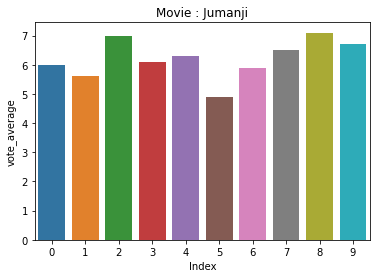

In [10]:
ax = sns.barplot(x=c.index, y=c.vote_average)
ax.set_xlabel('Index')
ax.set_ylabel('vote_average')
ax.set_title('Movie : Jumanji')

In [11]:
orignial_vote_average = pd.DataFrame(data[data.title == x])

In [12]:
orignial_vote_average.vote_average

1    6.9
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'Movie : Jumanji')

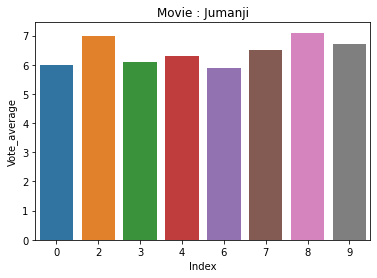

In [49]:
ax = sns.barplot(x=c.index[c.vote_average >= 5.9],y=c.vote_average[c.vote_average >= 5.9])
ax.set_xlabel('Index')
ax.set_ylabel('Vote_average')
ax.set_title('Movie : Jumanji')

Text(0.5, 1.0, 'Movie : Jumanji')

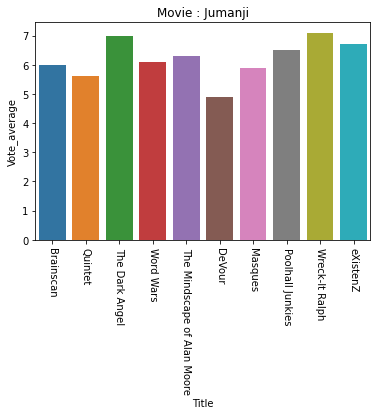

In [23]:
ax = sns.barplot(x=c.title, y=c.vote_average)
plt.xticks(rotation = - 90 )
ax.set_xlabel('Title')
ax.set_ylabel('Vote_average')
ax.set_title('Movie : Jumanji')

In [15]:
# 상영시간

In [27]:
r = b[['title','runtime']]

In [17]:
print(r)

                         title  runtime
0                    Brainscan     96.0
1                      Quintet    118.0
2               The Dark Angel    106.0
3                    Word Wars     80.0
4  The Mindscape of Alan Moore     78.0
5                       DeVour     90.0
6                      Masques    100.0
7             Poolhall Junkies     99.0
8               Wreck-It Ralph    108.0
9                     eXistenZ     97.0


Text(0.5, 1.0, 'Movie : Jumanji')

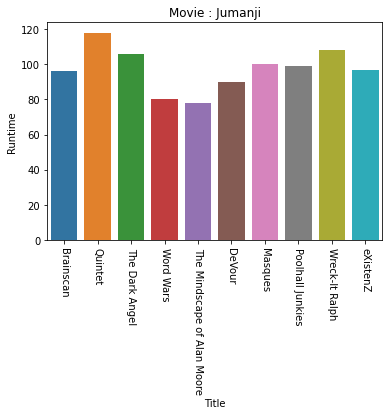

In [26]:
ax = sns.barplot(x=r.title, y=r.runtime)
plt.xticks(rotation = - 90 )
ax.set_xlabel('Title')
ax.set_ylabel('Runtime')
ax.set_title('Movie : Jumanji')

In [10]:
orignial_runtime = pd.DataFrame(data[data.title == x])
orignial_runtime.runtime

1    104.0
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Movie : Jumanji')

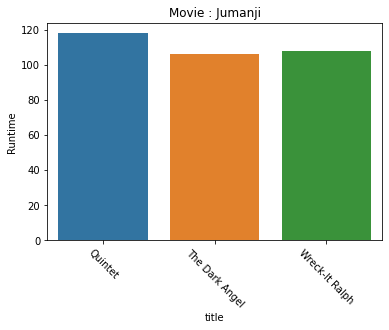

In [29]:
ax = sns.barplot(x=r.title[r.runtime >= 104], y=r.runtime[r.runtime >= 104])
plt.xticks(rotation = - 45 )
ax.set_xlabel('title')
ax.set_ylabel('Runtime')
ax.set_title('Movie : Jumanji')

Text(0.5, 1.0, 'Movie : Jumanji')

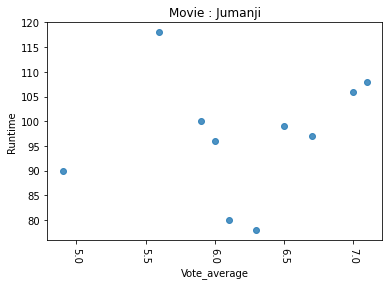

In [57]:
ax = sns.regplot(x=b.vote_average, y=b.runtime,fit_reg=False )
plt.xticks(rotation = - 90 )
ax.set_xlabel('Vote_average')
ax.set_ylabel('Runtime')
ax.set_title('Movie : Jumanji')

In [127]:
# 개봉날짜

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  20000 non-null  object 
 1   belongs_to_collection  2399 non-null   object 
 2   budget                 20000 non-null  object 
 3   genres                 20000 non-null  object 
 4   homepage               3055 non-null   object 
 5   id                     20000 non-null  object 
 6   imdb_id                19993 non-null  object 
 7   original_language      19999 non-null  object 
 8   original_title         20000 non-null  object 
 9   overview               20000 non-null  object 
 10  popularity             19998 non-null  object 
 11  poster_path            19907 non-null  object 
 12  production_companies   19999 non-null  object 
 13  production_countries   19999 non-null  object 
 14  release_date           19983 non-null  object 
 15  re

In [36]:
data['release_date'] = pd.to_datetime(data['release_date'],errors='coerce')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  20000 non-null  object        
 1   belongs_to_collection  2399 non-null   object        
 2   budget                 20000 non-null  object        
 3   genres                 20000 non-null  object        
 4   homepage               3055 non-null   object        
 5   id                     20000 non-null  object        
 6   imdb_id                19993 non-null  object        
 7   original_language      19999 non-null  object        
 8   original_title         20000 non-null  object        
 9   overview               20000 non-null  object        
 10  popularity             19998 non-null  object        
 11  poster_path            19907 non-null  object        
 12  production_companies   19999 non-null  object        
 13  p

In [59]:
data.release_date.isnull().sum()

18

In [41]:
b = a.merge(data,left_on='title', right_on="title")

In [42]:
t = b[['title','release_date','vote_average']]
print(t)

                         title release_date  vote_average
0                    Brainscan   1994-04-22           6.0
1                      Quintet   1979-02-09           5.6
2               The Dark Angel   1935-09-08           7.0
3                    Word Wars   2004-05-28           6.1
4  The Mindscape of Alan Moore   2003-08-24           6.3
5                       DeVour   2005-05-31           4.9
6                      Masques   1987-02-11           5.9
7             Poolhall Junkies   2002-06-07           6.5
8               Wreck-It Ralph   2012-11-01           7.1
9                     eXistenZ   1999-04-14           6.7


In [43]:
t['year'] = t['release_date'].dt.year
print(t)

                         title release_date  vote_average  year
0                    Brainscan   1994-04-22           6.0  1994
1                      Quintet   1979-02-09           5.6  1979
2               The Dark Angel   1935-09-08           7.0  1935
3                    Word Wars   2004-05-28           6.1  2004
4  The Mindscape of Alan Moore   2003-08-24           6.3  2003
5                       DeVour   2005-05-31           4.9  2005
6                      Masques   1987-02-11           5.9  1987
7             Poolhall Junkies   2002-06-07           6.5  2002
8               Wreck-It Ralph   2012-11-01           7.1  2012
9                     eXistenZ   1999-04-14           6.7  1999


<ipython-input-43-77d29a71047d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['year'] = t['release_date'].dt.year


In [44]:
old_t = t.loc[t.year < 2000]
print(old_t)

            title release_date  vote_average  year
0       Brainscan   1994-04-22           6.0  1994
1         Quintet   1979-02-09           5.6  1979
2  The Dark Angel   1935-09-08           7.0  1935
6         Masques   1987-02-11           5.9  1987
9        eXistenZ   1999-04-14           6.7  1999


In [45]:
new_t = t.loc[t.year >= 2000]
print(new_t)

                         title release_date  vote_average  year
3                    Word Wars   2004-05-28           6.1  2004
4  The Mindscape of Alan Moore   2003-08-24           6.3  2003
5                       DeVour   2005-05-31           4.9  2005
7             Poolhall Junkies   2002-06-07           6.5  2002
8               Wreck-It Ralph   2012-11-01           7.1  2012


Text(0.5, 1.0, 'Movie : Jumanji(Year < 2000)')

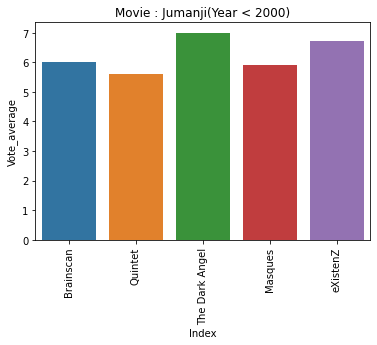

In [47]:
ax=sns.barplot(x=old_t.title, y=old_t.vote_average)
plt.xticks(rotation = 90 )
ax.set_xlabel("Title")
ax.set_ylabel("Vote_average")
ax.set_title("Movie : Jumanji(Year < 2000)")

Text(0.5, 1.0, 'Movie : Jumanji [Year < 2000]')

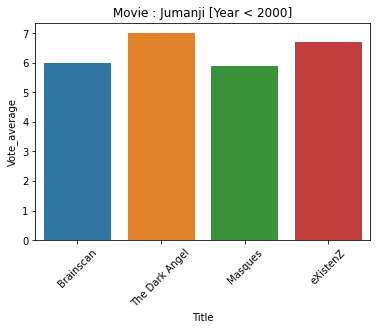

In [53]:
ax = sns.barplot(x=old_t.title[old_t.vote_average >= 5.9], y =old_t.vote_average[old_t.vote_average >= 5.9])
plt.xticks(rotation = 45 )
ax.set_xlabel("Title")
ax.set_ylabel("Vote_average")
ax.set_title("Movie : Jumanji [Year < 2000]")